# **Stock Price Prediction Using LSTM**

In [ ]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../input/google-stock-price/Google_Stock_Price_Train.csv')
df_test = pd.read_csv('../input/google-stock-price/Google_Stock_Price_Test.csv')

In [3]:
train_data = df_train.drop(['Date'], axis = 1)

In [4]:
train_data.head()

,Open,High,Low,Close,Volume
0,325.25,332.83,324.97,663.59,"7,380,500"
1,331.27,333.87,329.08,666.45,"5,749,400"
2,329.83,330.75,326.89,657.21,"6,590,300"
3,328.34,328.77,323.68,648.24,"5,405,900"
4,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
# removing comma present in numeric values
train_data["Volume"] =train_data["Volume"].map(lambda x: float(x.replace(',','')))
train_data["Close"] = train_data["Close"].map(lambda x: float(x.replace(',','')))

In [7]:
train_data.head()

,Open,High,Low,Close,Volume
0,325.25,332.83,324.97,663.59,7380500.0
1,331.27,333.87,329.08,666.45,5749400.0
2,329.83,330.75,326.89,657.21,6590300.0
3,328.34,328.77,323.68,648.24,5405900.0
4,322.04,322.29,309.46,620.76,11688800.0


In [8]:
train_data.shape[0]

1258

# Scaling the values using MinMaxScaler

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(train_data)

In [10]:
x_scaled.shape

(1258, 5)

# Let's prepare data for training

In [11]:
x_train = []
y_train = []

In [12]:
# make the  group of  60 values for every iteration
#you can choose any number instead of 60

for i in range(60,1258):                  #1258 is the length of scaled  data
    x_train.append(x_scaled[i-60:i])
    y_train.append(x_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train.shape, y_train.shape

((1198, 60, 5), (1198,))

# Let's build the model 

In [14]:
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.models import Sequential

In [15]:
model = Sequential()

# here I have used LSTM for building the model
model.add(LSTM(60, activation = 'relu', return_sequences = True, input_shape = (60,5)))
model.add(Dropout(0.02))

#Dropout is to avoid the overfitting
model.add(LSTM(80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.02))

model.add(LSTM(100, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.02))

model.add(LSTM(120, activation = 'relu' ))
model.add(Dropout(0.02))

# The output is of regression category that's why I have used one dense layer at the end.
model.add(Dense(1)) 

In [17]:
#It is a regression problem that's why the loss function I have used is mean_squared_error
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train,y_train, batch_size=32, epochs=50)

Epoch 1/50
38/38 [==============================] - 18s 344ms/step - loss: 0.1085
Epoch 2/50
38/38 [==============================] - 14s 363ms/step - loss: 0.0039
Epoch 3/50
38/38 [==============================] - 14s 365ms/step - loss: 0.0024
Epoch 4/50
38/38 [==============================] - 14s 369ms/step - loss: 0.0026
Epoch 5/50
38/38 [==============================] - 13s 342ms/step - loss: 0.0024
Epoch 6/50
38/38 [==============================] - 13s 348ms/step - loss: 0.0023
Epoch 7/50
38/38 [==============================] - 14s 378ms/step - loss: 0.0020
Epoch 8/50
38/38 [==============================] - 13s 344ms/step - loss: 0.0020
Epoch 9/50
38/38 [==============================] - 14s 370ms/step - loss: 0.0020
Epoch 10/50
38/38 [==============================] - 13s 347ms/step - loss: 0.0018
Epoch 11/50
38/38 [==============================] - 14s 377ms/step - loss: 0.0022
Epoch 12/50
38/38 [==============================] - 13s 347ms/step - loss: 0.0018
Epoch 13/50
3

# Working on Test data

In [21]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,1657300.0
1,1/4/2017,788.36,791.34,783.16,786.90,1073000.0
2,1/5/2017,786.08,794.48,785.02,794.02,1335200.0
3,1/6/2017,795.26,807.90,792.20,806.15,1640200.0
4,1/9/2017,806.40,809.97,802.83,806.65,1272400.0


In [23]:
# to predict the 1st day of opening price we need last 60 days data
pre_data = train_data.tail(60)

In [24]:
df = pre_data.append(df_test[['Open','High','Low','Close','Volume']], ignore_index = True)

In [25]:
df.head()

,Open,High,Low,Close,Volume
0,779.00,780.48,775.54,776.86,1070700.0
1,779.66,779.66,770.75,775.08,933200.0
2,777.71,789.38,775.87,785.94,1174900.0
3,786.66,792.28,780.58,783.07,1372500.0
4,783.76,788.13,782.06,786.14,937400.0


In [26]:
data = scaler.transform(df)
data

array([[0.9299055 , 0.93239584, 0.9439309 , 0.39367171, 0.04256308],
       [0.93113327, 0.93086447, 0.93485755, 0.39121867, 0.03705647],
       [0.92750577, 0.94901675, 0.94455599, 0.40618497, 0.04673608],
       [0.94415507, 0.95443255, 0.9534778 , 0.40222979, 0.05464958],
       [0.93876032, 0.94668235, 0.95628125, 0.40646059, 0.03722467],
       [0.93403527, 0.9337778 , 0.93911956, 0.3955046 , 0.05436123],
       [0.93483518, 0.93887613, 0.94480224, 0.39597315, 0.03382459],
       [0.9313937 , 0.94242441, 0.94764358, 0.39794386, 0.04345615],
       [0.94636878, 0.9718565 , 0.96292999, 0.41902898, 0.08205847],
       [0.96569685, 0.97744038, 0.98653205, 0.42762841, 0.07044053],
       [0.97510976, 0.97626384, 0.9827436 , 0.42138555, 0.07006808],
       [0.95966962, 0.96791604, 0.97889832, 0.42469303, 0.05039247],
       [0.97808617, 0.99719872, 0.99939385, 0.4436283 , 0.0676652 ],
       [1.        , 1.        , 1.        , 0.43613136, 0.06281538],
       [0.98076494, 0.98188507, 0.

In [27]:
data.shape

(80, 5)

In [28]:
x_test = []
y_test = []

for i in range(60 , 80):
    x_test.append(data[i-60:i])    
    y_test.append(data[i, 0]) # opening stock price

In [29]:
x_test, y_test = np.array(x_test) , np.array(y_test)

In [30]:
y_test.shape

(20,)

In [31]:
#predicting the data
y_pre = model.predict(x_test)

In [32]:
y_pre

array([[0.94116426],
       [0.93671674],
       [0.9379524 ],
       [0.9413779 ],
       [0.9477587 ],
       [0.9563191 ],
       [0.9638414 ],
       [0.96898824],
       [0.971501  ],
       [0.97366565],
       [0.9738588 ],
       [0.9732483 ],
       [0.97299236],
       [0.9720075 ],
       [0.97313684],
       [0.97857225],
       [0.9868467 ],
       [0.9933881 ],
       [0.99621654],
       [0.9868005 ]], dtype=float32)

In [33]:
# Because the predicted values are in scaled format we have to perform inverse scaling
scaler.scale_

array([1.86025746e-03, 1.86751825e-03, 1.89422640e-03, 1.37811281e-03,
       4.00480577e-08])

In [34]:
scale = 1 / 1.86025746e-03 # scaling level

In [35]:
scale

537.5599998937781

In [36]:
y_pre = y_pre * scale
y_test = y_test * scale

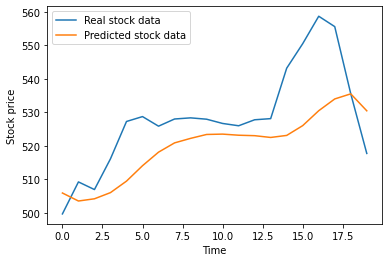

In [41]:
plt.plot(y_test, label = 'Real stock data')
plt.plot(y_pre, label  = 'Predicted stock data')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()